In [240]:
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
import numpy as np
import sympy as sy
from sympy import *
import matplotlib.pyplot as plt

URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')

In [241]:
results = soup.find(class_='content-inner')
results

<div class="content-inner">
<style>
    .number-table {
        font-size: 20px;
        font-weight: bold
    }

    .number-table-main {
        font-size: 24px;
        font-weight: bold
    }
</style>
<script src="/js/highcharts.js"></script>
<style type="text/css">
    <!--
    .source { }

    .style2 {
        color: #FF0000
    }

    .style4 {
        color: #FF0000;
        font-weight: bold;
    }

    .style6 {
        font-size: 12px;
        color: #bbb;
        font-weight: bold;
    }

    .source1 {
        font-size: 12px;
        color: #bbb;
    }

    .source1 {
        font-size: 12px;
        color: #bbb;
    }

    .source11 {
        font-size: 12px;
        color: #bbb;
    }    .source111 {
       
    } .source1111 {
        font-size: 12px;
        color: #bbb;
    }



    -->
</style>
<div class="label-counter" id="page-top">COVID-19 Coronavirus Pandemic</div>
<div style="font-size:13px; color:#999; margin-top:5px; text-align:center">Last updated: January

In [242]:
dates = ["Jan 22","Jan 23","Jan 24","Jan 25","Jan 26","Jan 27","Jan 28","Jan 29","Jan 30","Jan 31","Feb 01","Feb 02","Feb 03","Feb 04","Feb 05","Feb 06","Feb 07","Feb 08","Feb 09","Feb 10","Feb 11","Feb 12","Feb 13","Feb 14","Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17","Mar 18","Mar 19","Mar 20","Mar 21","Mar 22","Mar 23","Mar 24","Mar 25","Mar 26","Mar 27","Mar 28","Mar 29","Mar 30","Mar 31","Apr 01","Apr 02","Apr 03","Apr 04","Apr 05","Apr 06","Apr 07","Apr 08","Apr 09","Apr 10","Apr 11","Apr 12","Apr 13","Apr 14","Apr 15","Apr 16","Apr 17","Apr 18","Apr 19","Apr 20","Apr 21","Apr 22","Apr 23","Apr 24","Apr 25","Apr 26","Apr 27","Apr 28","Apr 29","Apr 30","May 01","May 02","May 03","May 04","May 05","May 06","May 07","May 08","May 09","May 10","May 11","May 12","May 13","May 14","May 15","May 16","May 17","May 18","May 19","May 20","May 21","May 22","May 23","May 24","May 25","May 26","May 27","May 28","May 29","May 30","May 31","Jun 01","Jun 02","Jun 03","Jun 04","Jun 05","Jun 06","Jun 07","Jun 08","Jun 09","Jun 10","Jun 11","Jun 12","Jun 13","Jun 14","Jun 15","Jun 16","Jun 17","Jun 18","Jun 19","Jun 20","Jun 21","Jun 22","Jun 23","Jun 24","Jun 25","Jun 26","Jun 27","Jun 28","Jun 29","Jun 30","Jul 01","Jul 02","Jul 03","Jul 04","Jul 05","Jul 06","Jul 07","Jul 08","Jul 09","Jul 10","Jul 11","Jul 12","Jul 13","Jul 14","Jul 15","Jul 16","Jul 17","Jul 18","Jul 19","Jul 20","Jul 21","Jul 22","Jul 23","Jul 24","Jul 25","Jul 26","Jul 27","Jul 28","Jul 29","Jul 30","Jul 31","Aug 01","Aug 02","Aug 03","Aug 04","Aug 05","Aug 06","Aug 07","Aug 08","Aug 09","Aug 10","Aug 11","Aug 12","Aug 13","Aug 14","Aug 15","Aug 16","Aug 17","Aug 18","Aug 19","Aug 20","Aug 21","Aug 22","Aug 23","Aug 24","Aug 25","Aug 26","Aug 27","Aug 28","Aug 29","Aug 30","Aug 31","Sep 01","Sep 02","Sep 03","Sep 04","Sep 05","Sep 06","Sep 07","Sep 08","Sep 09","Sep 10","Sep 11","Sep 12","Sep 13","Sep 14","Sep 15","Sep 16","Sep 17","Sep 18","Sep 19","Sep 20","Sep 21","Sep 22","Sep 23","Sep 24","Sep 25","Sep 26","Sep 27","Sep 28","Sep 29","Sep 30","Oct 01","Oct 02","Oct 03","Oct 04","Oct 05","Oct 06","Oct 07","Oct 08","Oct 09","Oct 10","Oct 11","Oct 12","Oct 13","Oct 14","Oct 15","Oct 16","Oct 17","Oct 18","Oct 19","Oct 20","Oct 21","Oct 22","Oct 23","Oct 24","Oct 25","Oct 26","Oct 27","Oct 28","Oct 29","Oct 30","Oct 31","Nov 01","Nov 02","Nov 03","Nov 04","Nov 05","Nov 06","Nov 07","Nov 08","Nov 09","Nov 10","Nov 11","Nov 12","Nov 13","Nov 14","Nov 15","Nov 16","Nov 17","Nov 18","Nov 19","Nov 20","Nov 21","Nov 22","Nov 23","Nov 24","Nov 25","Nov 26","Nov 27","Nov 28","Nov 29","Nov 30","Dec 01","Dec 02","Dec 03","Dec 04","Dec 05","Dec 06","Dec 07","Dec 08","Dec 09","Dec 10","Dec 11","Dec 12","Dec 13","Dec 14","Dec 15","Dec 16","Dec 17","Dec 18","Dec 19","Dec 20","Dec 21","Dec 22","Dec 23","Dec 24","Dec 25","Dec 26","Dec 27","Dec 28","Dec 29","Dec 30","Dec 31","Jan 01","Jan 02","Jan 03","Jan 04","Jan 05","Jan 06"]
number_cases = [0,267,473,699,786,1784,1478,1760,2011,2130,2627,2854,3253,3927,3728,3184,3453,2685,3003,2573,2050,14179,5176,2682,2132,2157,2031,1880,534,1033,1059,1037,629,994,864,1140,1460,1824,2208,2644,2628,3319,3194,4314,5137,5791,5938,7282,8835,11384,13397,16703,17303,19370,20684,23024,27103,31958,38773,33613,36673,44583,45011,49183,61761,66661,67500,61205,65077,75783,78780,81434,86731,83855,74416,77998,84299,89466,90878,98449,86186,77034,77100,80432,87036,87781,89766,84871,78813,82983,81832,84205,86658,98601,91573,74759,71815,78248,81510,89310,96275,83837,83183,82606,83561,97250,97221,97090,89198,80975,74516,88632,92021,99005,102472,97257,83643,93108,98054,105016,110278,109706,102246,98705,93482,95880,109748,119552,129042,126914,111308,104416,118254,123022,133633,133538,131330,116995,110895,124088,138891,141071,145667,138073,127611,129462,147203,149390,144141,185369,160862,133828,143100,167562,177994,184600,198820,181290,167963,166347,179227,202454,213403,218142,199310,181876,175674,212663,218172,228201,241886,220764,202312,200345,224133,239873,253250,244560,230295,225866,209085,243939,284354,279902,292918,265225,227960,222222,252858,293134,291286,295091,263425,227151,204252,257697,276917,288021,287124,274670,229379,221946,271683,293495,290680,294050,268724,221708,206607,262867,279911,276334,267191,273064,216042,221866,259455,283130,282794,295484,268400,231508,253691,266656,291909,294346,311299,282764,244928,208324,252582,293627,307877,322077,295294,258407,253928,285114,313484,318262,330178,304711,262323,241415,281121,321348,319715,330416,308553,265167,241229,293609,320422,328244,332424,309561,261080,275262,314635,352889,360147,367017,377818,294419,279540,320846,388705,406024,421847,397882,352741,350077,391953,445797,485223,498025,479881,435441,418517,466392,517587,550772,577447,503217,471492,479289,495314,574327,625287,633197,632088,506774,494766,561174,625983,653134,669591,605553,521552,513317,564689,627129,660121,674095,609385,529248,542553,565273,643893,623439,622600,592585,521529,502452,585620,644802,690878,696835,644350,554771,535427,605961,664104,700362,714412,656068,555726,535751,597321,726150,736423,722534,634891,564071,541391,613107,696559,695462,535127,469266,437308,498213,626645,737365,760605,632065,570104,528355,554763,701319,786764]

In [243]:
results

<div class="content-inner">
<style>
    .number-table {
        font-size: 20px;
        font-weight: bold
    }

    .number-table-main {
        font-size: 24px;
        font-weight: bold
    }
</style>
<script src="/js/highcharts.js"></script>
<style type="text/css">
    <!--
    .source { }

    .style2 {
        color: #FF0000
    }

    .style4 {
        color: #FF0000;
        font-weight: bold;
    }

    .style6 {
        font-size: 12px;
        color: #bbb;
        font-weight: bold;
    }

    .source1 {
        font-size: 12px;
        color: #bbb;
    }

    .source1 {
        font-size: 12px;
        color: #bbb;
    }

    .source11 {
        font-size: 12px;
        color: #bbb;
    }    .source111 {
       
    } .source1111 {
        font-size: 12px;
        color: #bbb;
    }



    -->
</style>
<div class="label-counter" id="page-top">COVID-19 Coronavirus Pandemic</div>
<div style="font-size:13px; color:#999; margin-top:5px; text-align:center">Last updated: January

In [244]:
x = np.arange(len(number_cases))
y = np.array(number_cases)

In [245]:
x = x.reshape(-1,1)

In [246]:
lr = LinearRegression() 
lr.fit(x, y)

LinearRegression()

In [247]:
x_new = np.linspace(0, 350, 100)
y_new = lr.predict(x_new[:, np.newaxis])

Text(0.5, 0, 'Tiempo')

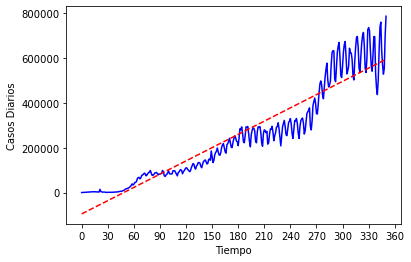

In [248]:
ax = plt.axes()
x_ticks = np.arange(0, 365, 30)
plt.xticks(x_ticks)
ax.plot(x, y, color="blue")
ax.plot(x_new, y_new, color="red",  linestyle='dashed')
ax.set_ylabel('Casos Diarios')
ax.set_xlabel('Tiempo')